### Linear Regression 
Medium from Amber: 

https://medium.com/@qempsil0914/machine-learning-notes-week2-multivariate-linear-regression-mse-gradient-descent-normal-e15785f771bd

Coursera (Andrew Ng):

https://www.coursera.org/learn/machine-learning#about

# **What is Linear Regression ?**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

[Reference - https://www.ibm.com/topics/linear-regression]

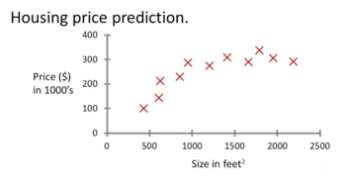

##Regression Problem: predict continuous valued label
Suppose we have a training dataset and each data is represented as (x, y).
In Regression Problem, x ∈X is the feature and y∈Y is the continuous valued label.



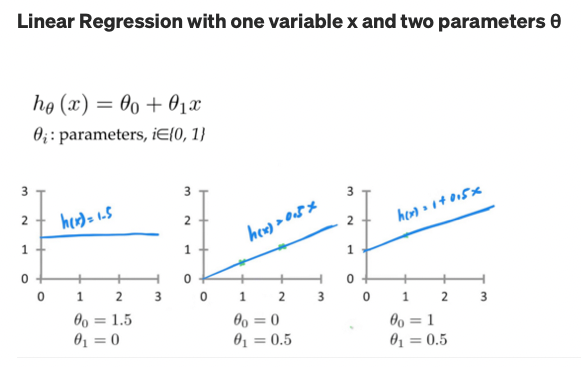

After applying Learning Algorithm, our model will learn a hypothesis function h: X → Y so that h(x) is a ‘good’ predictor for the corresponding value of y.


Example: Housing Price Prediction!

스크린샷 2022-09-12 오후 2.01.05.png

## Cost (Error; Loss; Objective) Function

The accuracy of Hypothesis Function can be measured by using Cost Function.


Mean Squared error Function, which is one of the Cost Function

스크린샷 2022-09-12 오후 2.23.25.png

`Minimize the Cost Function!!!`

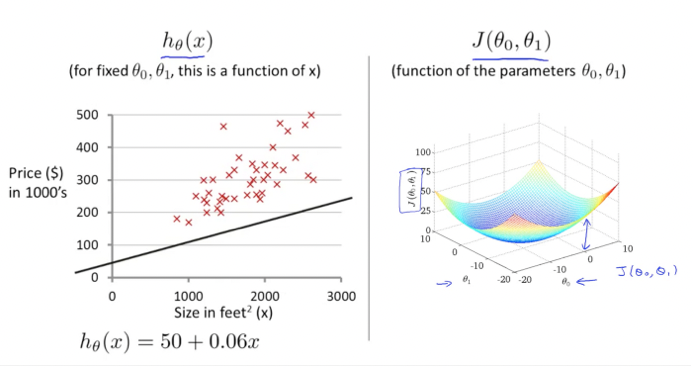

## Gradient Descent Algorithm

The way to minimize the cost function

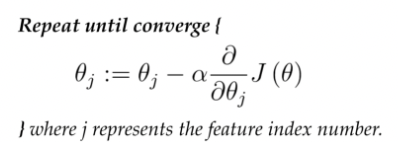

## Learning Rate
α == Learning Rate

If α is too small, Gradient Descent is slow.

If α is too large, Gradient Descent may overshoot minimum and not converge.


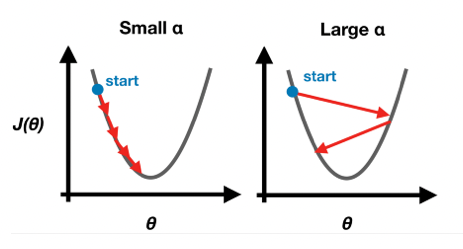

## Overall 
스크린샷 2022-09-12 오후 2.31.01.png

Then.... 

Why don't we implement this one with NumPy or PyTorch?

In [ ]:
#Sample Dataset
import torch

# Input Variant == x, Output(label) == y
x = torch.FloatTensor([[1], [2], [3]])  # Feet 
y = torch.FloatTensor([[3], [6], [9]])   #House Price 

#Parameters Y = theta_1 * x + theta_2
theta_1 = torch.zeros(1, requires_grad = True)
theta_2 = torch.zeros(1, requires_grad = True)

#Linear Hypothesis
hypothesis = theta_1 * x + theta_2    ## ---> We want the model to be tuned (theta_1 == 0.3, theta_2 = 10)

In [ ]:
#Cost Function
def cost_function(Prediction, Label):
  return torch.mean((Prediction - Label) ** 2)

In [ ]:
#Learning_rate
learning_rate = 0.01
# Gradient Descent
optimizer = torch.optim.SGD([theta_1, theta_2], lr = learning_rate)

In [ ]:
#zero_grad == Initialize the gradient to 0
#optimizer.zero_grad()

# backward() == Derivative of Cost Function 
#cost_function(hypothesis, y).backward()

# step() == Update the Parameters (theta_1, theta_2)


In [ ]:

epochs = 5000
for epoch in range(epochs):
  p = theta_1 * x + theta_2
  loss = cost_function(p, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 100 == 0:
          print('Epoch {:4d}/{} theta_1: {:.3f}, theta_2: {:.3f} Loss: {:.6f}'.format(
              epoch, epochs, theta_1.item(), theta_2.item(), loss.item()
          ))

Epoch    0/5000 theta_1: 2.854, theta_2: 0.331 Loss: 0.015803
Epoch  100/5000 theta_1: 2.886, theta_2: 0.260 Loss: 0.009765
Epoch  200/5000 theta_1: 2.910, theta_2: 0.205 Loss: 0.006034
Epoch  300/5000 theta_1: 2.929, theta_2: 0.161 Loss: 0.003729
Epoch  400/5000 theta_1: 2.944, theta_2: 0.126 Loss: 0.002304
Epoch  500/5000 theta_1: 2.956, theta_2: 0.099 Loss: 0.001424
Epoch  600/5000 theta_1: 2.966, theta_2: 0.078 Loss: 0.000880
Epoch  700/5000 theta_1: 2.973, theta_2: 0.061 Loss: 0.000544
Epoch  800/5000 theta_1: 2.979, theta_2: 0.048 Loss: 0.000336
Epoch  900/5000 theta_1: 2.983, theta_2: 0.038 Loss: 0.000208
Epoch 1000/5000 theta_1: 2.987, theta_2: 0.030 Loss: 0.000128
Epoch 1100/5000 theta_1: 2.990, theta_2: 0.023 Loss: 0.000079
Epoch 1200/5000 theta_1: 2.992, theta_2: 0.018 Loss: 0.000049
Epoch 1300/5000 theta_1: 2.994, theta_2: 0.014 Loss: 0.000030
Epoch 1400/5000 theta_1: 2.995, theta_2: 0.011 Loss: 0.000019
Epoch 1500/5000 theta_1: 2.996, theta_2: 0.009 Loss: 0.000012
Epoch 16

# **Exercise: ** 

Build the most robust linear regression model which could minimize the loss between 'median_income' and 'median_house_value'

In [ ]:
#Dataset 
import pandas as pd

df = pd.read_csv('housing.csv')

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [ ]:
df = df[['median_income', 'median_house_value']]

In [ ]:
incomes = torch.FloatTensor(df[f'{list(df.columns)[0]}']*0.1).unsqueeze(1)
prices = torch.FloatTensor(df[f'{list(df.columns)[1]}']*0.00001).unsqueeze(1)

In [ ]:
def cost_function(Prediction, Label):
  return torch.mean((Prediction - Label) ** 2)

In [ ]:
class linear_regression():
  
  def __init__(self, learning_rate):

    self.theta = torch.zeros(1, requires_grad = True)
    self.theta_2 = torch.zeros(1, requires_grad = True)
    self.learning_rate = learning_rate

  def forward(self, x):
    return self.theta * x + self.theta_2

In [ ]:
model = linear_regression(learning_rate = 0.005)
optimizer = torch.optim.SGD([model.theta, model.theta_2], lr = model.learning_rate)

In [ ]:
EPOCHS = 50000

for epoch in range(EPOCHS +1):
  predictions = model.forward(incomes)
  loss = cost_function(predictions, prices)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 10000 == 0:
          print('Epoch {:4d}/{} theta_1: {:.3f}, theta_2: {:.3f} Loss: {:.6f}'.format(
              epoch, epochs, model.theta.item(), model.theta_2.item(), loss.item()
          ))

Epoch    0/5000 theta_1: 4.179, theta_2: 0.451 Loss: 0.701131
Epoch 10000/5000 theta_1: 4.179, theta_2: 0.451 Loss: 0.701131
Epoch 20000/5000 theta_1: 4.179, theta_2: 0.451 Loss: 0.701131
Epoch 30000/5000 theta_1: 4.179, theta_2: 0.451 Loss: 0.701131
Epoch 40000/5000 theta_1: 4.179, theta_2: 0.451 Loss: 0.701131
Epoch 50000/5000 theta_1: 4.179, theta_2: 0.451 Loss: 0.701131


In [ ]:
model.forward(torch.tensor().unsqueeze(1))

In [ ]:
def predict(model, x):
  print(f"My current income : $ {x} ")
  x = x / 100000
  print(f"My predicted House Price : $ {round(float(model.forward(torch.tensor([x]).unsqueeze(1)).detach()) / 0.00001)}")

In [ ]:
predict(model, 3000)

My current income : $ 3000 
My predicted House Price : $ 57648


# Linear Regression With torch.nn !


torch.nn Documentation https://pytorch.org/docs/stable/nn.html

In [ ]:
import torch.nn as nn

class NN_Model(nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(NN_Model, self).__init__()
        self.linear = nn.Linear(1,1)
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred

In [ ]:
model = NN_Model()

In [ ]:
model

NN_Model(
  (linear): Linear(in_features=1, out_features=768, bias=True)
  (linear_2): Linear(in_features=768, out_features=1, bias=True)
)

In [ ]:
model.linear

Linear(in_features=1, out_features=768, bias=True)

In [ ]:
model.linear.bias

Parameter containing:
tensor([-0.9035,  0.8212,  0.6777, -0.0879,  0.2275, -0.9424, -0.0787,  0.5329,
        -0.4597, -0.2641,  0.3319, -0.0478,  0.3466, -0.5224,  0.5989, -0.2572,
         0.7637,  0.9605,  0.6693,  0.8268,  0.5877, -0.1540,  0.3308,  0.6053,
         0.0350,  0.2501, -0.7779, -0.9234,  0.9682, -0.8642, -0.0131, -0.8082,
        -0.8212, -0.8559,  0.8255, -0.3230,  0.1020,  0.4389,  0.4328,  0.0726,
        -0.7700,  0.6195, -0.5170,  0.8673,  0.3285,  0.5549,  0.2566, -0.9335,
         0.3598, -0.9347, -0.6274, -0.0719,  0.1377, -0.2503, -0.8559,  0.1127,
         0.0396, -0.2217, -0.3387, -0.3421, -0.3527, -0.2649,  0.9497,  0.1806,
        -0.8599, -0.6992, -0.8011, -0.3772, -0.5188, -0.0874, -0.5359, -0.4374,
         0.0713, -0.5279,  0.5882, -0.9617, -0.1919,  0.1338, -0.3032,  0.6958,
        -0.4551, -0.1145, -0.2201, -0.7062, -0.9146,  0.6294, -0.7426, -0.3103,
        -0.7573,  0.5927, -0.6313, -0.0457,  0.9411, -0.0592, -0.4114, -0.5092,
         0.9552,  

In [ ]:
model.linear.weight

Parameter containing:
tensor([[ 1.6367e-01],
        [-2.8229e-01],
        [-2.5499e-01],
        [ 7.3539e-01],
        [-2.7508e-01],
        [-7.0349e-01],
        [-2.4038e-01],
        [ 6.9680e-01],
        [-8.0817e-01],
        [ 2.4633e-01],
        [-8.8997e-01],
        [-5.1054e-01],
        [-8.3730e-01],
        [ 9.8883e-01],
        [-6.8362e-01],
        [-8.3385e-01],
        [-9.7741e-01],
        [-6.7041e-01],
        [-1.5524e-01],
        [-8.9966e-01],
        [ 5.8089e-02],
        [ 5.5507e-01],
        [-3.6807e-01],
        [ 3.3799e-01],
        [ 7.3809e-01],
        [-8.2976e-02],
        [-5.2678e-01],
        [ 7.1741e-01],
        [-1.6002e-01],
        [-3.5180e-01],
        [ 4.5772e-01],
        [-5.0836e-01],
        [ 2.4705e-01],
        [-7.8964e-01],
        [ 7.3975e-01],
        [ 8.1190e-01],
        [-2.9364e-01],
        [ 2.4453e-01],
        [ 7.4443e-01],
        [ 4.8946e-01],
        [-3.0898e-01],
        [-2.9709e-01],
        [ 7.

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

In [ ]:
for epoch in range(50000):
    y_pred = model(incomes)
    loss = criterion(y_pred, prices)
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()  
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
            print('Epoch {:4d}/{} Loss: {:.6f}'.format(
                epoch, epochs, loss.item()
            ))

RuntimeError: ignored